### Seaborn package

In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [35]:
sns.__version__

'0.12.2'

In [36]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')   # 여객 운송 데이터
mpg = sns.load_dataset('mpg')           # Mile Per Galon data

- 1차원 분포

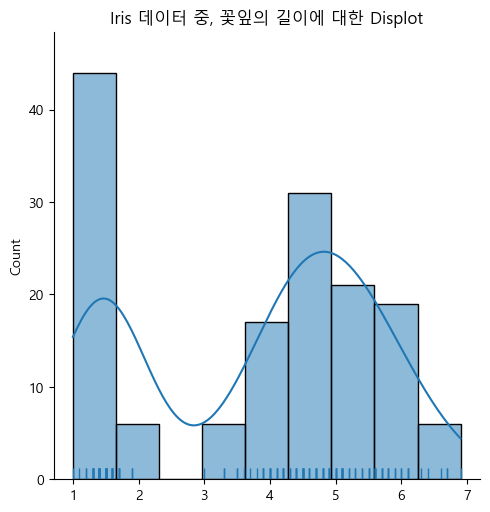

In [37]:
# displot(distribution plot)
x = iris.petal_length.values
sns.displot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Displot")
plt.show()


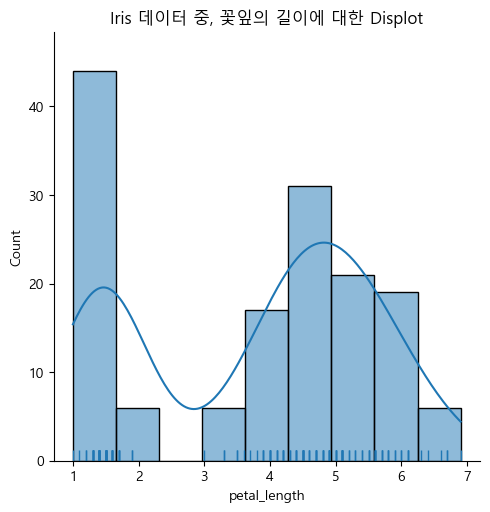

In [38]:
sns.displot(x = 'petal_length', kde=True, rug=True, data=iris)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Displot")
plt.show()

- 카운트 플롯

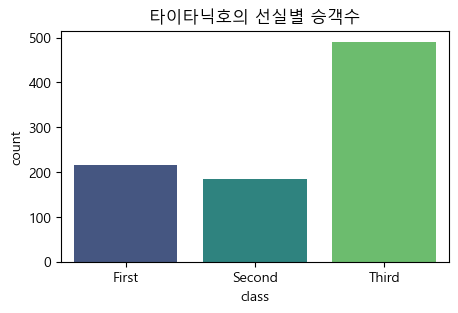

In [39]:
plt.figure(figsize=(5, 3))
sns.countplot(data=titanic, x='class', palette='viridis')
plt.title('타이타닉호의 선실별 승객수')
plt.show()

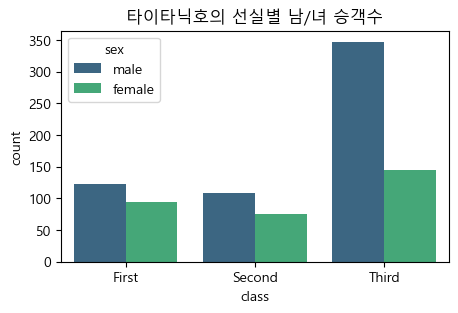

In [40]:
plt.figure(figsize=(5, 3))
sns.countplot(data=titanic, x='class', hue='sex', palette='viridis')
plt.title('타이타닉호의 선실별 남/녀 승객수')
plt.show()

- 다차원 실수 데이터

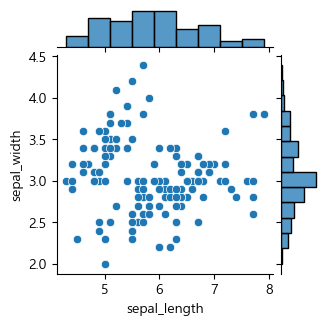

In [41]:
# joint plot
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width')
fig.fig.set_size_inches(3, 3)
plt.show()

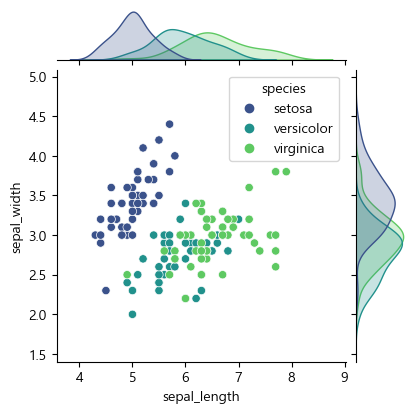

In [42]:
# joint plot을 좀 더 세련되게
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='viridis')
fig.fig.set_size_inches(4, 4)
plt.show()

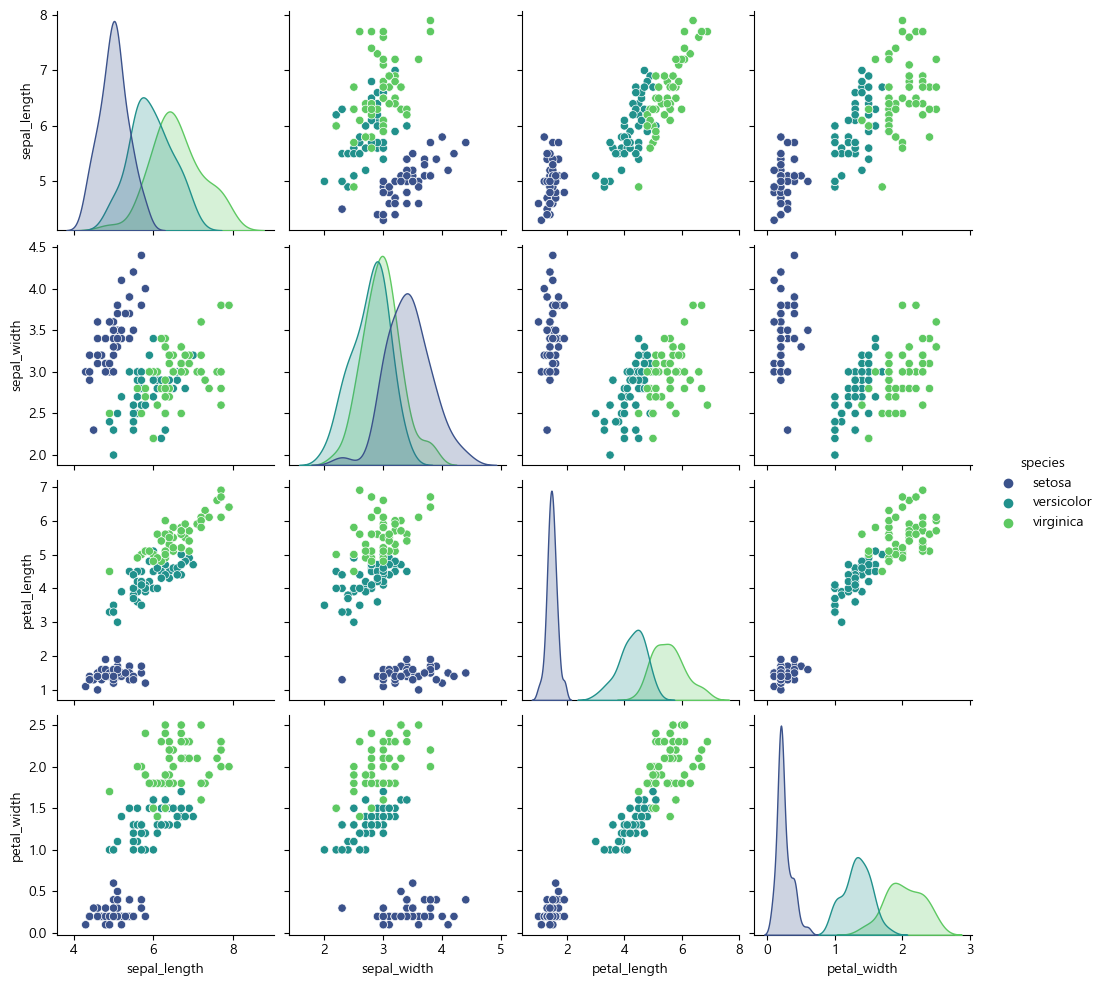

In [43]:
# pair plot
sns.pairplot(data=iris, hue='species', palette='viridis')
plt.show()

- 다차원 카테고리 데이터

<Axes: xlabel='class'>

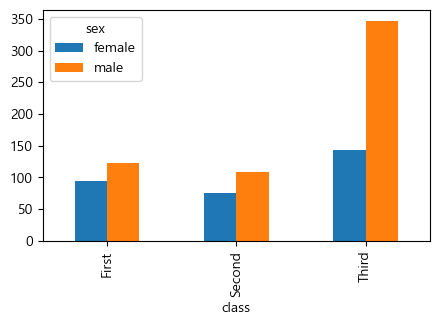

In [57]:
# 타이타닉호의 선실별 남/녀 승객수
titanic.groupby(['class', 'sex'])['survived'].count().unstack().plot(kind='bar', figsize=(5, 3))

In [58]:
dt = titanic.pivot_table('survived', 'class', 'sex', 'count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


Text(0.5, 1.0, '타이타닉호의 선실별 남/녀 승객 Heatmap')

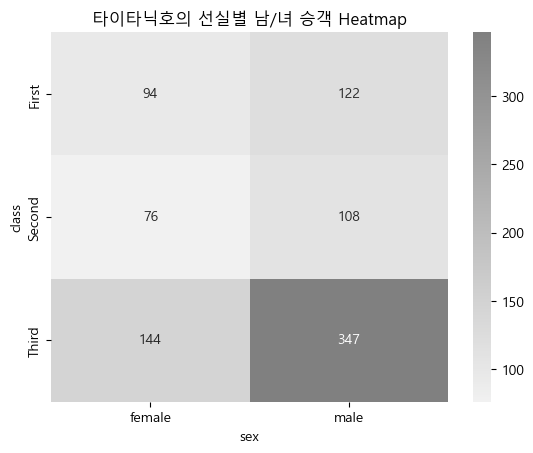

In [64]:
sns.heatmap(dt, cmap=sns.light_palette('gray', as_cmap=True) , annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남/녀 승객 Heatmap')

Text(0.5, 1.0, '타이타닉호의 선실별 남/녀 승객 Heatmap')

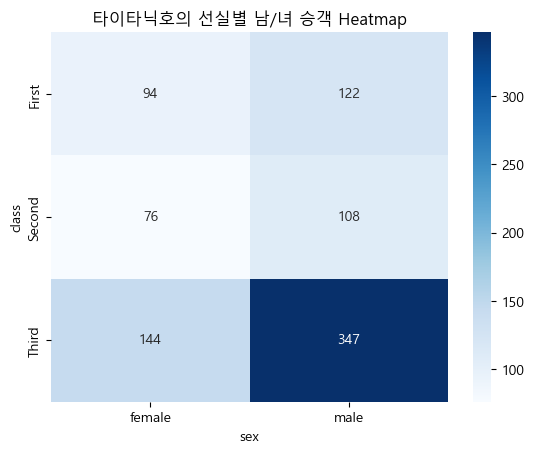

In [68]:
sns.heatmap(dt, cmap='Blues', annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남/녀 승객 Heatmap')

In [69]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


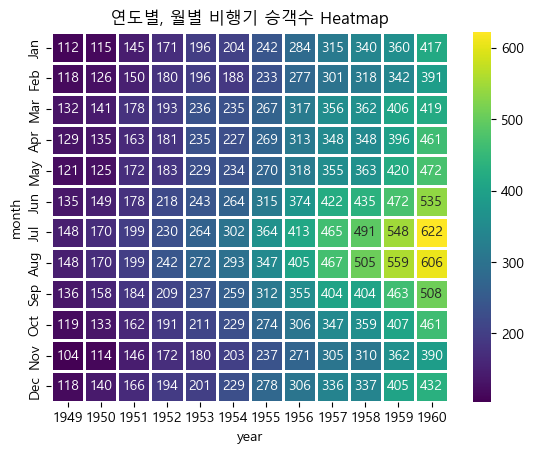

In [80]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(passengers, cmap='viridis', annot=True, fmt='d', linewidths=1)
plt.title('연도별, 월별 비행기 승객수 Heatmap')
plt.show()

- 다차원 복합 데이터 - barplot

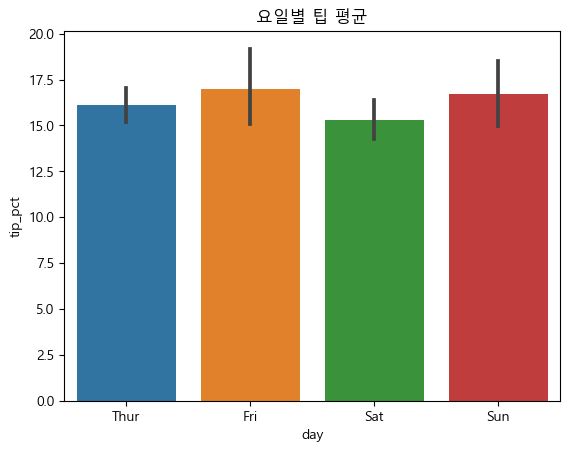

In [83]:
tips['tip_pct'] = (tips['tip'] / tips['total_bill'] * 100).round(2)
sns.barplot(tips, x='day', y='tip_pct')
plt.title('요일별 팁 평균')
plt.show()

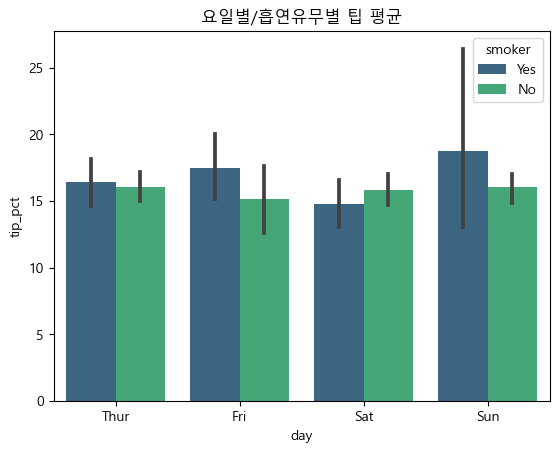

In [85]:
sns.barplot(tips, x='day', y='tip_pct', hue='smoker', palette='viridis')
plt.title('요일별/흡연유무별 팁 평균')
plt.show()

In [87]:
###########################################################################
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [88]:
# 제조사별 평균 mpg
mpg['menufacturer'] = mpg['name'].apply(lambda x: x.split()[0])
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,menufacturer
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


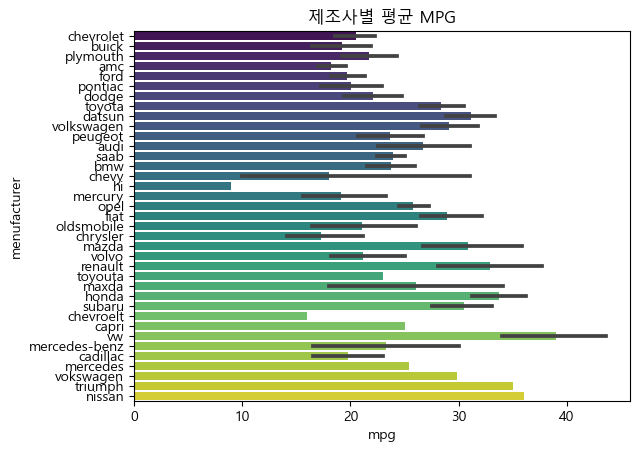

In [90]:
sns.barplot(data=mpg, x='mpg', y='menufacturer', palette='viridis')
plt.title('제조사별 평균 MPG')
plt.show()

- boxplot

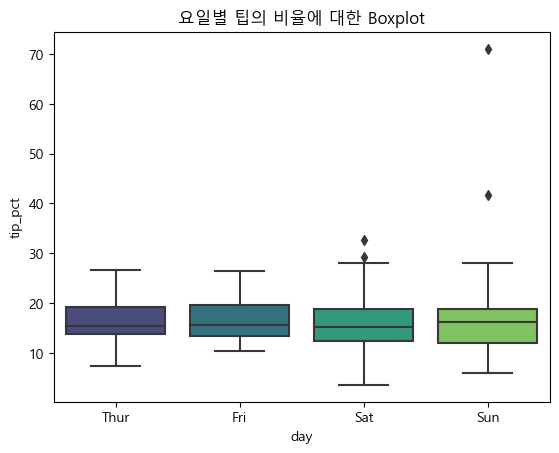

In [91]:
# 요일별 팁의 비율
sns.boxplot(data=tips, x='day', y='tip_pct', palette='viridis')
plt.title('요일별 팁의 비율에 대한 Boxplot');

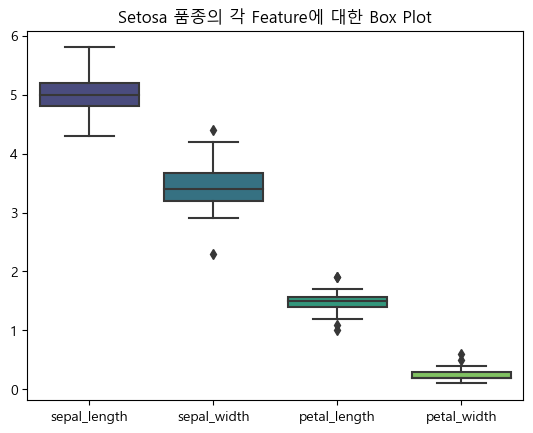

In [94]:
# Iris 데이터의 pairplot
sns.boxplot(iris[iris.species=='setosa'], palette='viridis')
plt.title('Setosa 품종의 각 Feature에 대한 Box Plot');

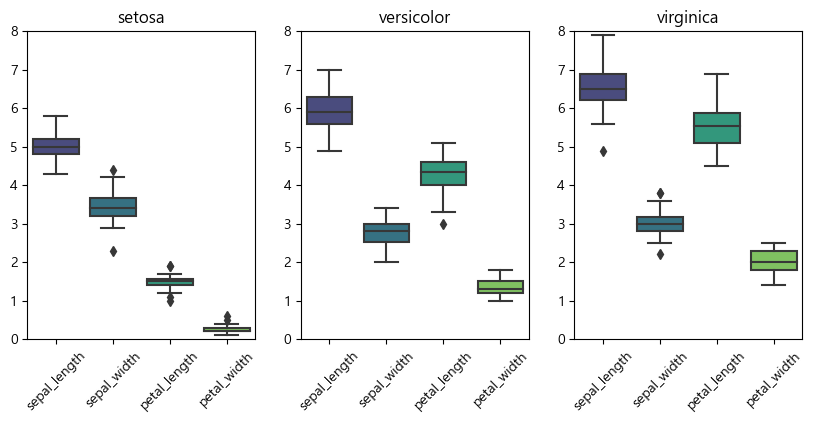

In [107]:
# Iris 모든 품종별 각 Feature에 대한 Box Plot
plt.figure(figsize=(10, 4))
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    plt.xlim(0, 8), plt.ylim(0, 8)
    sns.boxplot(iris[iris.species==species], palette='viridis')
    plt.xticks(rotation=45)
    plt.title(species)
plt.show()



- regplot(regression plot)

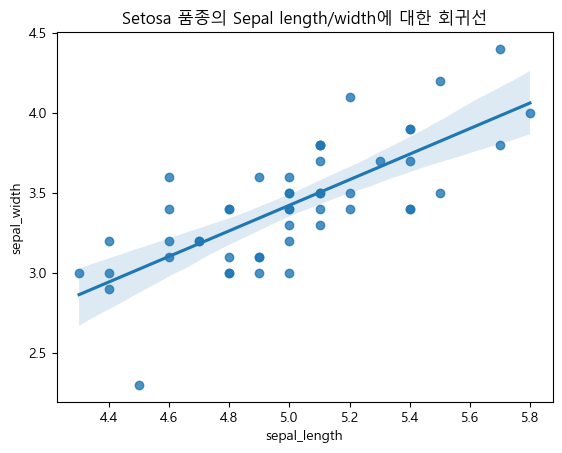

In [110]:
sns.regplot(data=iris[iris.species=='setosa'], x='sepal_length', y='sepal_width')
plt.title('Setosa 품종의 Sepal length/width에 대한 회귀선');

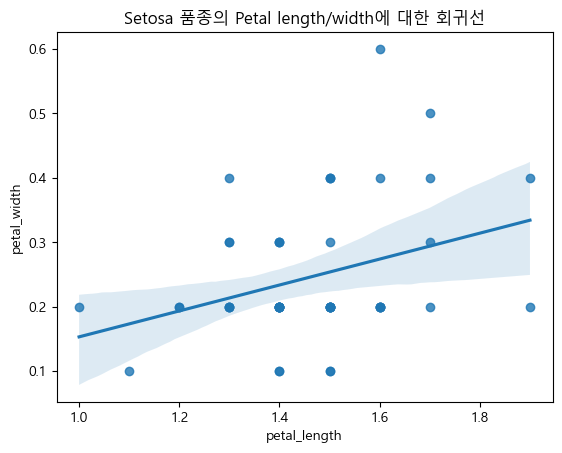

In [111]:
sns.regplot(data=iris[iris.species=='setosa'], x='petal_length', y='petal_width')
plt.title('Setosa 품종의 Petal length/width에 대한 회귀선');